In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [73]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [75]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

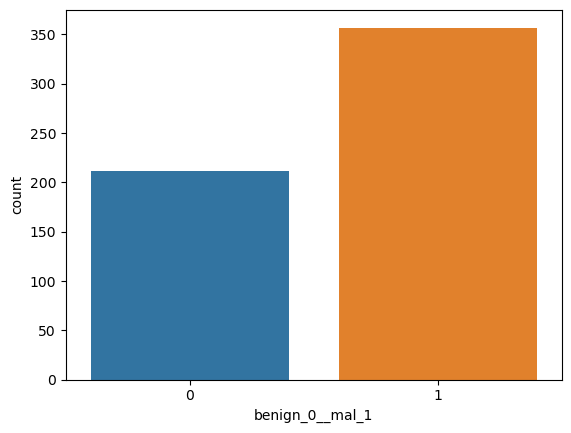

In [76]:
sns.countplot(x='benign_0__mal_1',data=df)

<Axes: >

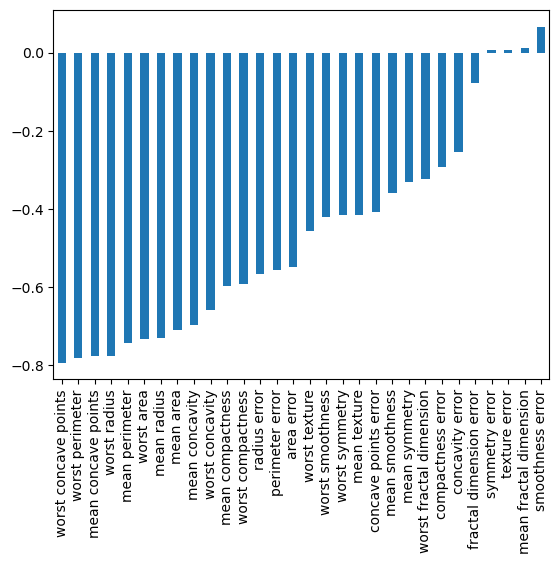

In [77]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<Axes: >

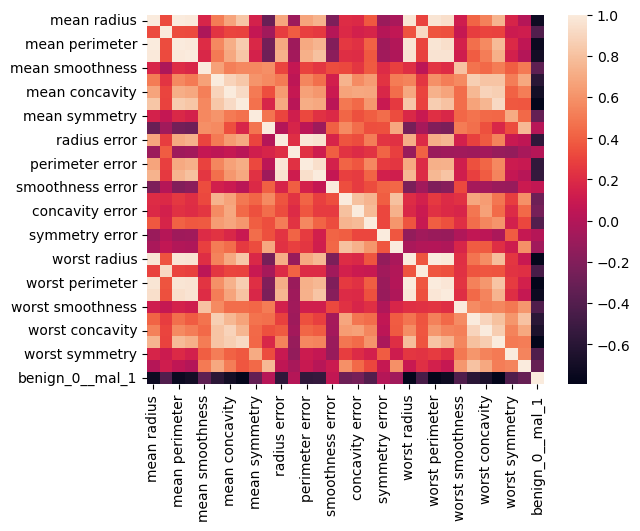

In [78]:
sns.heatmap(df.corr())

In [79]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
scaler = MinMaxScaler()

In [84]:
X_train = scaler.fit_transform(X_train)

In [85]:
X_test = scaler.transform(X_test)

In [86]:
from tensorflow.keras.models import Sequential

In [87]:
from tensorflow.keras.layers import Dense,Dropout

In [88]:
X_train.shape

(426, 30)

In [89]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [90]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.6909 - val_loss: 0.6750
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6658 - val_loss: 0.6504
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6335 - val_loss: 0.6199
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5981 - val_loss: 0.5816
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5569 - val_loss: 0.5356
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5141 - val_loss: 0.4890
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4673 - val_loss: 0.4424
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4244 - val_loss: 0.3951
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3822 - val_loss: 0.3533
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3461 - val_loss: 0.3170
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0535 - val_loss: 0.1174
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0538 - val_loss: 0.1171
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0539 - val_loss: 0.1213
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0551 - val_loss: 0.1232
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0524 - val_loss: 0.1174
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0551 - val_loss: 0.1187
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0524 - val_loss: 0.1209
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0537 - val_loss: 0.1206
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0528 - val_loss: 0.1218
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0515 - val_loss: 0.1245
Epoch 93/600


14/14 [==============================] - 0s 4ms/step - loss: 0.0442 - val_loss: 0.1374
Epoch 165/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0420 - val_loss: 0.1430
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0495 - val_loss: 0.1393
Epoch 167/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0457 - val_loss: 0.1340
Epoch 168/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0417 - val_loss: 0.1430
Epoch 169/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0429 - val_loss: 0.1403
Epoch 170/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0417 - val_loss: 0.1442
Epoch 171/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0418 - val_loss: 0.1442
Epoch 172/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0414 - val_loss: 0.1364
Epoch 173/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0418 - val_loss: 0.1466
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0369 - val_loss: 0.1601
Epoch 246/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0376 - val_loss: 0.1513
Epoch 247/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0342 - val_loss: 0.1787
Epoch 248/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0362 - val_loss: 0.1559
Epoch 249/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0447 - val_loss: 0.1704
Epoch 250/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0387 - val_loss: 0.1622
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0380 - val_loss: 0.1699
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0377 - val_loss: 0.1553
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0362 - val_loss: 0.1606
Epoch 254/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0350 - val_loss: 0.1739
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0350 - val_loss: 0.1684
Epoch 327/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0394 - val_loss: 0.1973
Epoch 328/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0337 - val_loss: 0.1577
Epoch 329/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0324 - val_loss: 0.1938
Epoch 330/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0291 - val_loss: 0.1645
Epoch 331/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0323 - val_loss: 0.1909
Epoch 332/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0403 - val_loss: 0.1598
Epoch 333/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.1790
Epoch 334/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0291 - val_loss: 0.1724
Epoch 335/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0325 - val_loss: 0.1820
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0338 - val_loss: 0.1698
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0313 - val_loss: 0.2162
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0279 - val_loss: 0.1933
Epoch 410/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0277 - val_loss: 0.2004
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0276 - val_loss: 0.2000
Epoch 412/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0281 - val_loss: 0.1934
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0282 - val_loss: 0.1939
Epoch 414/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0292 - val_loss: 0.1824
Epoch 415/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0258 - val_loss: 0.2019
Epoch 416/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0252 - val_loss: 0.1939
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0230 - val_loss: 0.1959
Epoch 489/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0230 - val_loss: 0.2102
Epoch 490/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0245 - val_loss: 0.2414
Epoch 491/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0244 - val_loss: 0.2135
Epoch 492/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0235 - val_loss: 0.2065
Epoch 493/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0226 - val_loss: 0.2172
Epoch 494/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0220 - val_loss: 0.2083
Epoch 495/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0217 - val_loss: 0.2170
Epoch 496/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0228 - val_loss: 0.2294
Epoch 497/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0215 - val_loss: 0.2069
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.2569
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0188 - val_loss: 0.2209
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0230 - val_loss: 0.2815
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0294 - val_loss: 0.2031
Epoch 573/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0206 - val_loss: 0.2787
Epoch 574/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0203 - val_loss: 0.2169
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0186 - val_loss: 0.2615
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0187 - val_loss: 0.2436
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0235 - val_loss: 0.2721
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0262 - val_loss: 0.1955
Epoc

In [91]:
losses = pd.DataFrame(model.history.history)

<Axes: >

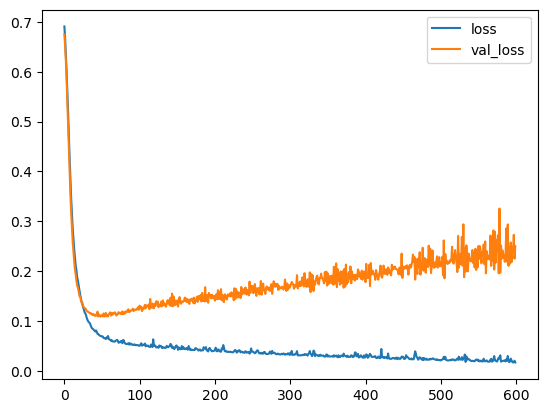

In [92]:
losses.plot()

In [93]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [94]:
from tensorflow.keras.callbacks import EarlyStopping

In [95]:
early_stop = EarlyStopping(monitor='val_loss',mode = 'min',verbose = 1,patience = 25)

In [96]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.6730 - val_loss: 0.6489
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6377 - val_loss: 0.6191
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6043 - val_loss: 0.5853
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5679 - val_loss: 0.5469
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5270 - val_loss: 0.5011
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4812 - val_loss: 0.4534
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4352 - val_loss: 0.4019
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3877 - val_loss: 0.3576
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3479 - val_loss: 0.3174
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3130 - val_loss: 0.2825
Epoch 11

<Axes: >

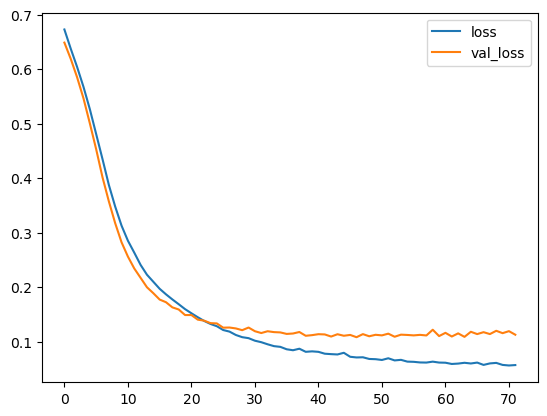

In [97]:

model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [98]:
from tensorflow.keras.layers import Dropout

In [99]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [100]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.7008 - val_loss: 0.6762
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6794 - val_loss: 0.6653
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6660 - val_loss: 0.6548
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6507 - val_loss: 0.6341
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6368 - val_loss: 0.6125
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6179 - val_loss: 0.5861
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5990 - val_loss: 0.5599
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5792 - val_loss: 0.5321
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5536 - val_loss: 0.5033
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5356 - val_loss: 0.4745
Epoch 11

14/14 [==============================] - 0s 5ms/step - loss: 0.1299 - val_loss: 0.0989
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1327 - val_loss: 0.1057
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1055 - val_loss: 0.1101
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1358 - val_loss: 0.1001
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1186 - val_loss: 0.0967
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1314 - val_loss: 0.1143
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1357 - val_loss: 0.1048
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1198 - val_loss: 0.0990
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1256 - val_loss: 0.1038
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1084 - val_loss: 0.1040
Epoch 93/600


<Axes: >

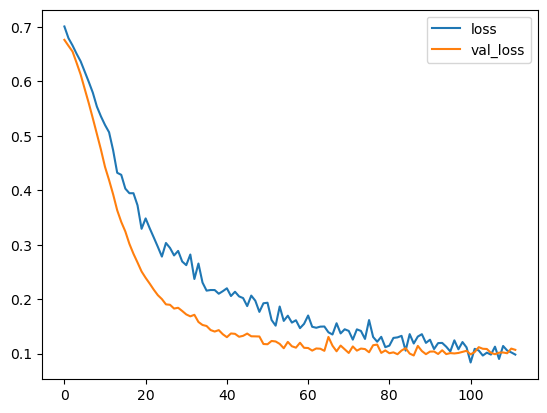

In [101]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()


In [102]:
 model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [103]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.6933 - val_loss: 0.6738
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6900 - val_loss: 0.6601
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6601 - val_loss: 0.6475
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6375 - val_loss: 0.6205
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6297 - val_loss: 0.5903
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6159 - val_loss: 0.5659
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5877 - val_loss: 0.5349
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5601 - val_loss: 0.5101
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5321 - val_loss: 0.4829
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5112 - val_loss: 0.4522
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.1140 - val_loss: 0.1236
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1171 - val_loss: 0.1115
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1154 - val_loss: 0.1075
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0923 - val_loss: 0.1201
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0955 - val_loss: 0.1201
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1263 - val_loss: 0.1148
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1003 - val_loss: 0.1135
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1171 - val_loss: 0.1166
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0963 - val_loss: 0.1072
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0915 - val_loss: 0.1056
Epoch 93/600


<Axes: >

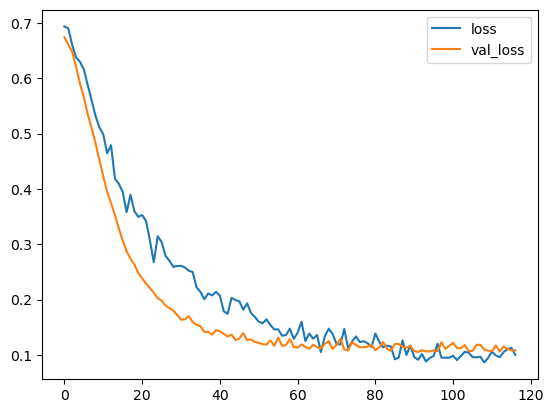

In [104]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
